## Network Science Predicts Who Dies Next in Game of Thrones

This code is exact copy of the other file. The only difference is that it employs the dataset without gender variable. So the models make predictions based on solely network measures of the characters.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, train_test_split 
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve 
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
# Loading the dataset
df = pd.read_csv("got_ed.csv", header = 0, sep = ';')

### Data Preparation and Feature Engineering

In [79]:
# Check for missing values
df.isna().sum()

id                      0
died                    0
degree                  0
weighted degree         0
pageranks               0
clustering              0
eigencentrality         0
closnesscentrality      0
betweenesscentrality    0
dtype: int64

In [80]:
df.dropna(inplace=True)

In [81]:
df.head()

,id,died,degree,weighted degree,pageranks,clustering,eigencentrality,closnesscentrality,betweenesscentrality
0,Joffrey Baratheon,yes,34,73,0.010648,0.567251,0.516207,0.510730,0.005207
1,Benjen Stark,yes,23,34,0.007571,0.651515,0.411720,0.508547,0.009492
2,Theon Greyjoy,no,43,155,0.013937,0.324111,0.507033,0.548387,0.030976
3,Jon Snow Stark,no,74,374,0.024013,0.240216,0.698632,0.595000,0.122631
4,Melisandre,no,15,59,0.005920,0.535714,0.106703,0.399329,0.000965


In [82]:
# Convert 'died' column to numerical values
df['died'] = df['died'].replace({'yes': 1, 'no': 0})

# Print the updated dataframe
print(df.head())

                  id  died  degree  weighted degree  pageranks  clustering  \
0  Joffrey Baratheon     1      34               73   0.010648    0.567251   
1       Benjen Stark     1      23               34   0.007571    0.651515   
2      Theon Greyjoy     0      43              155   0.013937    0.324111   
3     Jon Snow Stark     0      74              374   0.024013    0.240216   
4         Melisandre     0      15               59   0.005920    0.535714   

   eigencentrality  closnesscentrality  betweenesscentrality  
0         0.516207            0.510730              0.005207  
1         0.411720            0.508547              0.009492  
2         0.507033            0.548387              0.030976  
3         0.698632            0.595000              0.122631  
4         0.106703            0.399329              0.000965  


In [83]:
df['died'] = df['died'].astype('category')

In [84]:
df.describe()

,degree,weighted degree,pageranks,clustering,eigencentrality,closnesscentrality,betweenesscentrality
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,26.265957,69.819149,0.008974,0.591838,0.295524,0.455617,0.013240
std,19.154817,69.947747,0.005517,0.204082,0.225777,0.063597,0.027552
min,3.000000,5.000000,0.002947,0.231383,0.008257,0.344928,0.000000
25%,15.000000,30.250000,0.005610,0.425055,0.148891,0.412122,0.000606
50%,21.000000,47.000000,0.007028,0.586364,0.233917,0.444861,0.002267
75%,26.750000,76.750000,0.009593,0.731818,0.343262,0.494303,0.008305
max,92.000000,374.000000,0.027764,1.000000,1.000000,0.626316,0.127912


In [85]:
# Split data into 5 equal groups for validation

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [86]:
# Build different models to train on the data

models = [LogisticRegression(solver='liblinear'), RandomForestClassifier(n_estimators=400, random_state=42), 
          DecisionTreeClassifier(random_state=42), svm.SVC(kernel='rbf', gamma='scale', random_state=42), 
          KNeighborsClassifier()]

In [87]:
# Define target and features
id_col = df['id']
X = df.drop(['id', 'died'], axis=1) # Features
y = df['died'] # Target variable

In [88]:
# Validate each model using K-fold cross validation

mean=[]
std=[]
for model in models:
    result = cross_val_score(model, X, y, cv=kfold, scoring="accuracy", n_jobs=-1)
    mean.append(result)
    std.append(result)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

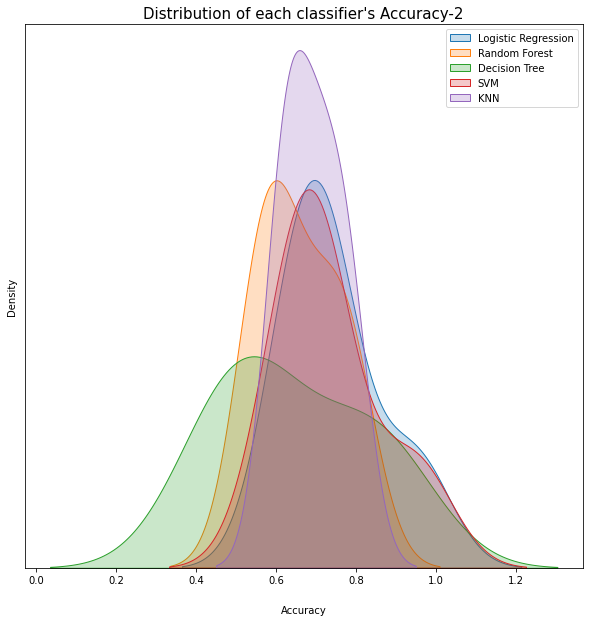

In [119]:
classifiers=['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'KNN']

plt.figure(figsize=(10, 10))
for i in range(len(mean)):
    sns.distplot(mean[i], hist=False, kde_kws={"shade": True})
    
plt.title("Distribution of each classifier's Accuracy-2", fontsize=15)
plt.legend(classifiers)
plt.xlabel("Accuracy", labelpad=20)
plt.yticks([])

plt.show()

Even with the original dataset, KNN is performing best.

### Turing the SVM model using GridSearch

In [90]:
c = [0.1, 0.3, 0.5, 0.7, 0.9]
gamma = [0.1, 0.3, 0.5, 0.7, 0.9]
kernel = ['rbf','linear']

hyper_parameters = {'kernel': kernel, 'C': c, 'gamma': gamma}

gs = GridSearchCV(estimator=svm.SVC(), param_grid=hyper_parameters,verbose=True, cv=kfold, n_jobs=-1)

# Find the best hyper-parameters using grid-search (this might take a while)
gs.fit(X,y)
print(gs.best_score_)
print(gs.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0.7438596491228069
SVC(C=0.1, gamma=0.1, kernel='linear')


In [91]:
# Split data keeping 80% for training and the rest for test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, 
                                                    shuffle=True, random_state=42)

In [107]:
svm_clf = svm.SVC(C=0.1, gamma=0.1, kernel='linear', probability=True, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the classfiers
svm_clf.fit(x_train, y_train)


SVC(C=0.1, gamma=0.1, kernel='linear', probability=True, random_state=42)

In [108]:
rf_clf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

In [109]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [110]:
# Get the probability of assigning each sample to either class
svm_prob = svm_clf.predict_proba(x_test)
rf_prob = rf_clf.predict_proba(x_test)
knn_prob = knn_clf.predict_proba(x_test)

# Get the actual predictions
svm_preds = np.argmax(svm_prob, axis=1)
rf_preds = np.argmax(rf_prob, axis=1)
knn_preds = np.argmax(knn_prob, axis=1)

## Performance Comparison

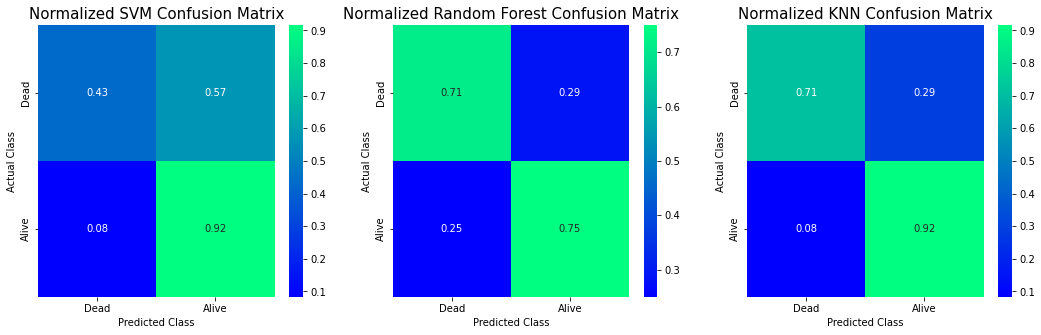

In [120]:
cm = confusion_matrix(y_test, svm_preds)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm2 = confusion_matrix(y_test, rf_preds)
cm2 = cm2.astype('float') / cm2.sum(axis=1)[: , np.newaxis]
cm_knn = confusion_matrix(y_test, knn_preds)
cm_knn = cm_knn.astype('float') / cm_knn.sum(axis=1)[: , np.newaxis]

classes = ["Dead", "Alive"]
f, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].set_title("Normalized SVM Confusion Matrix", fontsize=15.)
sns.heatmap(pd.DataFrame(cm, index=classes, columns=classes), 
            cmap='winter', annot=True, fmt='.2f', ax=ax[0]).set(xlabel="Predicted Class", ylabel="Actual Class")

ax[1].set_title("Normalized Random Forest Confusion Matrix", fontsize=15.)
sns.heatmap(pd.DataFrame(cm2, index=classes, columns=classes), 
            cmap='winter', annot=True, fmt='.2f', ax=ax[1]).set(xlabel="Predicted Class", 
                                                                ylabel="Actual Class")
ax[2].set_title("Normalized KNN Confusion Matrix", fontsize=15.)
sns.heatmap(pd.DataFrame(cm_knn, index=classes, columns=classes), 
            cmap='winter', annot=True, fmt='.2f', ax=ax[2]).set(xlabel="Predicted Class", 
                                                                ylabel="Actual Class")
plt.show()

Without gender variable, performance of the Random Forest model worsened. Now it is much more people as dead even though they are alive.

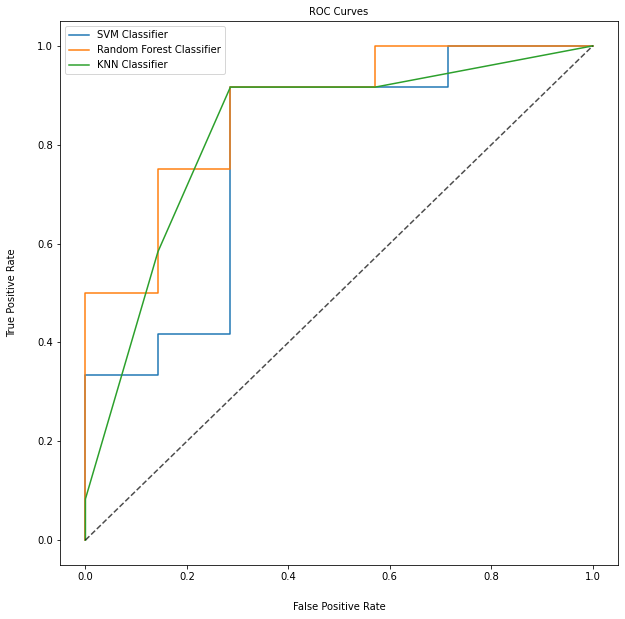

In [112]:
# Plot ROC curves
fig = plt.figure(figsize=(10, 10))
plt.plot(*roc_curve(y_test, svm_prob[:, 1])[:2])
plt.plot(*roc_curve(y_test, rf_prob[:, 1])[:2])
plt.plot(*roc_curve(y_test, knn_prob[:, 1])[:2])
plt.legend(["SVM Classifier", "Random Forest Classifier", "KNN Classifier"], loc="upper left")
plt.plot((0., 1.), (0., 1.), "--k", alpha=.7) 
plt.xlabel("False Positive Rate", labelpad=20)
plt.ylabel("True Positive Rate", labelpad=20)
plt.title("ROC Curves", fontsize=10)
plt.show()

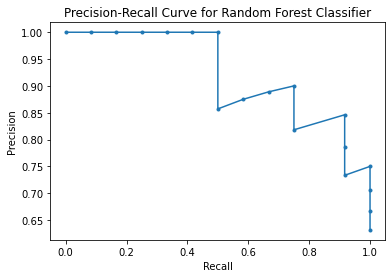

In [98]:
from sklearn.metrics import precision_recall_curve

# Get the precision and recall values for the Random Forest classifier
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_prob[:, 1])

# Plot the precision-recall curve
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest Classifier')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')

# Show the plot
plt.show()

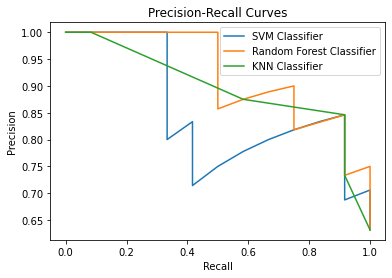

In [113]:
# Get the precision, recall and threshold values for each model
svm_precision, svm_recall, svm_threshold = precision_recall_curve(y_test, svm_prob[:, 1])
rf_precision, rf_recall, rf_threshold = precision_recall_curve(y_test, rf_prob[:, 1])
knn_precision, knn_recall, knn_threshold = precision_recall_curve(y_test, knn_prob[:, 1])

# Plot the precision-recall curves for all models
plt.plot(svm_recall, svm_precision, label="SVM Classifier")
plt.plot(rf_recall, rf_precision, label="Random Forest Classifier")
plt.plot(knn_recall, knn_precision, label="KNN Classifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.show()

In [114]:
# So lets take a look at how each model performs on each metric 
print("SVM Classifier Performance")
print("=" * 27)
print(classification_report(y_test, svm_preds, target_names=classes))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, svm_preds)))
print("AUC score: {:.2f}".format(roc_auc_score(y_test, svm_prob[:, 1])))
print("\n")

print("Random Forest Classifier Performance")
print("=" * 37)
print(classification_report(y_test, rf_preds, target_names=classes))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, rf_preds)))
print("AUC score: {:.2f}".format(roc_auc_score(y_test, rf_prob[:, 1])))
print("\n")

print("KNN Classifier Performance")
print("=" * 27)
print(classification_report(y_test, knn_preds, target_names=classes))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, knn_preds)))
print("AUC score: {:.2f}".format(roc_auc_score(y_test, knn_prob[:, 1])))
print("\n")

SVM Classifier Performance
              precision    recall  f1-score   support

        Dead       0.75      0.43      0.55         7
       Alive       0.73      0.92      0.81        12

    accuracy                           0.74        19
   macro avg       0.74      0.67      0.68        19
weighted avg       0.74      0.74      0.72        19

Accuracy: 0.74
AUC score: 0.79


Random Forest Classifier Performance
              precision    recall  f1-score   support

        Dead       0.62      0.71      0.67         7
       Alive       0.82      0.75      0.78        12

    accuracy                           0.74        19
   macro avg       0.72      0.73      0.72        19
weighted avg       0.75      0.74      0.74        19

Accuracy: 0.74
AUC score: 0.87


KNN Classifier Performance
              precision    recall  f1-score   support

        Dead       0.83      0.71      0.77         7
       Alive       0.85      0.92      0.88        12

    accuracy             

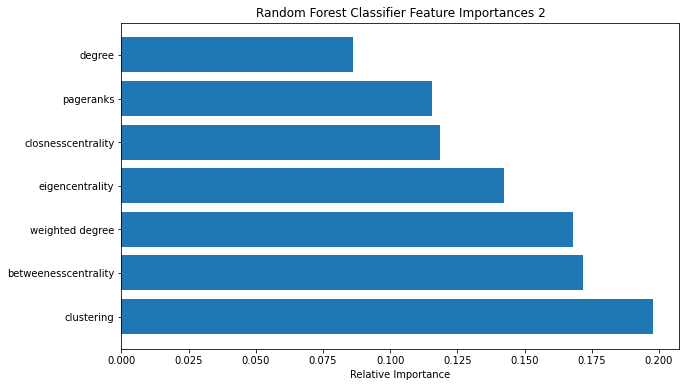

In [122]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Random Forest Classifier Feature Importances 2', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

In [116]:
#Predict the probability of dying for the entire dataset

# SVM model
svm_prob = svm_clf.predict_proba(X)[:, 1]

# Random Forest model
rf_prob = rf_clf.predict_proba(X)[:, 1]

# KNN model
knn_prob = knn_clf.predict_proba(X)[:, 1]

In [117]:
pd.set_option('display.max_rows', None)

In [118]:
# Create a DataFrame to store the results
#results_df = pd.DataFrame(index=y_test['id'], columns=["SVM", "Random Forest", "KNN"])

# Create a DataFrame to store the results
results_df = pd.DataFrame(index=id_col[X.index], columns=["SVM", "Random Forest", "KNN"])

# Fill the DataFrame with the probability of death for each model
results_df["SVM"] = svm_prob
results_df["Random Forest"] = rf_prob
results_df["KNN"] = knn_prob

# Print the results for each model
print("SVM Results:")
print("=" * 13)
print(results_df.sort_values(by=["SVM"], ascending=False)[["SVM"]])
print("\n")

print("Random Forest Results:")
print("=" * 23)
print(results_df.sort_values(by=["Random Forest"], ascending=False)[["Random Forest"]])
print("\n")

print("KNN Results:")
print("=" * 13)
print(results_df.sort_values(by=["KNN"], ascending=False)[["KNN"]])
print("\n")

SVM Results:
                                 SVM
id                                  
Ros                         0.765643
Alton Lannister             0.757261
Olyvar                      0.755645
Edmure Tully                0.754269
Gilly                       0.750449
Khal Moro                   0.742900
Rickard Karstark            0.742812
Black Walder Frey           0.741531
Karsi                       0.741099
Lothar Frey                 0.740093
Yoren                       0.738611
Areo                        0.737226
Tyene                       0.736877
Gendry                      0.736299
Obara                       0.736004
Benjen Stark                0.735864
Myranda                     0.734815
Lancel Lannister            0.733991
Syrio Forel                 0.733943
Maryn Trant                 0.733880
Roose Bolton                0.733136
Blackfish Tully             0.733063
Walder Frey                 0.729054
Septa Mordane               0.728474
Ygritte                  